# E0022_P06_Generate_sample_mapping

Completed by Rebecca Poulos.

Checked on 12/03/2020.

## Generate sample mapping

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib import gridspec
from matplotlib import mlab
from matplotlib.ticker import ScalarFormatter
import matplotlib.patheffects as PathEffects
from matplotlib.patches import Patch
from datetime import datetime
import datetime as dt

In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set(style='white', font_scale=1)

In [3]:
outline_props = dict(color='black',linewidth=0.25)

### Define colours

In [4]:
instrument_colours={
    'M01':'#66c2a5', 
    'M02':'#fc8d62', 
    'M03':'#8da0cb', 
    'M04':'#e78ac3', 
    'M05':'#a6d854', 
    'M06':'#ffd92f'
}

batch_colours={
    'P01':'#7fc97f', 
    'P02':'#beaed4', 
    'P03':'#fdc086', 
    'P04':'#386cb0', 
    'P05':'#f0027f', 
    'P06':'#bf5b17'
}

hek_colours = {
    'Control_HEK293T_lys': '#d8b365',
    'Control_HEK293T_std_H002': '#5ab4ac',
    'Control_HEK293T_std_H003': '#addad6'
}

In [5]:
instrument_patch = []
for instrument in instrument_colours:
    instrument_patch.append(Patch(facecolor=instrument_colours[instrument], edgecolor='black', label=''))

batch_patch = []
for batch in batch_colours:
    batch_patch.append(Patch(facecolor=batch_colours[batch], edgecolor='black', label=''))

### Generate sample lists

##### P02

In [6]:
df_p02 = pd.read_excel('Generate_sample_mapping/E0022_P01_P02-Sanger_TA.xlsx', sheet_name='Tracking', parse_dates=False)
p02_files = df_p02[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()
p02_files_to_exclude = list(set(df_p02[lambda x: (x.File_QC_check != 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()))
print('Files in Batch 2:',len(p02_files))

Files in Batch 2: 885


##### P03

In [7]:
df_p03 = pd.read_excel('Generate_sample_mapping/E0022_P03_TA.xlsx', sheet_name='Tracking', parse_dates=False)
p03_files = df_p03[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()
p03_files_to_exclude = list(set(df_p03[lambda x: (x.File_QC_check != 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()))
print('Files in Batch 3:',len(p03_files))

Files in Batch 3: 3081


##### P04

In [8]:
df_p04 = pd.read_excel('Generate_sample_mapping/E0022_P04_TA.xlsx', sheet_name='Tracking', parse_dates=False)
p04_files = df_p04[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()
p04_files_to_exclude = list(set(df_p04[lambda x: (x.File_QC_check != 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()))
print('Files in Batch 4:',len(p04_files))

Files in Batch 4: 2105


##### P05

In [9]:
df_p05 = pd.read_excel('Generate_sample_mapping/E0022_P05_TA.xlsx', sheet_name='Tracking', parse_dates=False)
p05_files = df_p05[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()
p05_files_to_exclude = list(set(df_p05[lambda x: (x.File_QC_check != 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()))
p05_files = [x for x in p05_files if '-K_' not in x]
print('Files in Batch 5:',len(p05_files))

Files in Batch 5: 927


##### P06

In [10]:
df_p06 = pd.read_excel('Generate_sample_mapping/E0022_P06_TA.xlsx', sheet_name='Tracking', parse_dates=False).rename(columns={' ':'Automatic_MS_filename'})
p06_files = df_p06[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()
p06_files_to_exclude = list(set(df_p06[lambda x: (x.File_QC_check != 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()))
print('Files in Batch 6:',len(p06_files))

Files in Batch 6: 278


##### P01 - P06

In [11]:
sample_keys = p02_files + p03_files + p04_files + p05_files + p06_files
sample_keys = [x.lower() for x in sample_keys]
print('Total files to be processed:',len(sample_keys))

Total files to be processed: 7276


##### Reconciliation between sample keys and processing folder

In [12]:
processing_files = pd.read_csv('Generate_sample_mapping/processing_folder_e0022_040320', header=None)[0].tolist()
processing_files = [x.replace('.wiff','').lower() for x in processing_files]
print('Number of files in processing folder:',len(processing_files))

Number of files in processing folder: 7754


In [13]:
p02_files_to_exclude = [x.lower() for x in p02_files_to_exclude if str(x) != 'nan']
p03_files_to_exclude = [x.lower() for x in p03_files_to_exclude if str(x) != 'nan']
p04_files_to_exclude = [x.lower() for x in p04_files_to_exclude if str(x) != 'nan']
p05_files_to_exclude = [x.lower() for x in p05_files_to_exclude if str(x) != 'nan']
p06_files_to_exclude = [x.lower() for x in p06_files_to_exclude if str(x) != 'nan']
files_to_exclude = list(set(p02_files_to_exclude + p03_files_to_exclude + p04_files_to_exclude + p05_files_to_exclude + p06_files_to_exclude))

In [14]:
num = 0
for x in processing_files:
    if x not in sample_keys:
        num += 1
        if x not in files_to_exclude and '-k_' not in x:
            print(x)
print('Number of files in processing folder that aren\'t captured in the Sanger list for processing:',num)

Number of files in processing folder that aren't captured in the Sanger list for processing: 478


In [15]:
num = 0
for x in sample_keys:
    if x not in processing_files:
        print(x)
        num += 1
print('Number of files in Sanger list that aren\'t in the processing folder:',num)

Number of files in Sanger list that aren't in the processing folder: 0


In [16]:
7754 - 7276

478

### Generate run info

In [17]:
def get_naming_dictionaries(input_file):
    dict_lims_to_code = pd.read_excel(input_file, sheet_name='Prep')[['Original_code','LIMS_ID1']].drop_duplicates().set_index('LIMS_ID1').dropna()
    dict_lims_to_code['Original_code'] = dict_lims_to_code['Original_code'].astype(str)
    dict_lims_to_code['Original_code'] = dict_lims_to_code['Original_code'].str.replace('\.0','')
    dict_lims_to_code = dict_lims_to_code.to_dict()['Original_code']
    return dict_lims_to_code

##### P02

In [18]:
p02_run_info = df_p02.set_index('Automatic_MS_filename')[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]
p02_run_info.index = p02_run_info.index.str.lower()
p02_run_info = p02_run_info[lambda x: x.index.isin(sample_keys)][['General_sample_info','Date run','MS_used','Replicate']]
p02_run_info['Date'] = pd.to_datetime(p02_run_info['Date run'])
p02_run_info = p02_run_info.drop('Date run', axis=1)
p02_run_info['Batch'] = 'P02'

In [19]:
p02_run_info[['Code','Replicate']] = p02_run_info['General_sample_info'].str.split('_', expand=True)
p02_run_info.loc[p02_run_info[lambda x: x.Code == '8070'].index.tolist(),'Code'] = '3337' # Checked, per spreadsheet documentation
p02_run_info = p02_run_info.drop('General_sample_info', axis=1)
p02_run_info['Daisy_chain'] = 'No'

##### P03

In [20]:
p03_run_info = df_p03.set_index('Automatic_MS_filename')[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]
p03_run_info.index = p03_run_info.index.str.lower()
p03_run_info = p03_run_info[lambda x: x.index.isin(sample_keys)][['LIMS-ID1','Date run','MS_used','Replicate']]
p03_run_info['Batch'] = 'P03'
p03_run_info.loc['190820_hek-qcs_000f2_00gz3_m05_s_1','MS_used'] = 'M04'# Checked, per correspondence with Peter

In [21]:
p03_lims_to_code = get_naming_dictionaries('Generate_sample_mapping/E0022_P03_TA.xlsx')

##### P04

In [22]:
p04_run_info = df_p04.set_index('Automatic_MS_filename')[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]
p04_run_info.index = p04_run_info.index.str.lower()
p04_run_info = p04_run_info[lambda x: x.index.isin(sample_keys)][['LIMS-ID1','Date run','MS_used','Replicate']]
p04_run_info['Batch'] = 'P04'

In [23]:
p04_lims_to_code = get_naming_dictionaries('Generate_sample_mapping/E0022_P04_TA.xlsx')
DC_dict_P04 = pd.read_excel('Generate_sample_mapping/E0022_P04_TA.xlsx', sheet_name='Sanger_info')[['Pellet Count', 'Cell ID Used']].dropna()
DC_dict_P04['Pellet Count'] = DC_dict_P04['Pellet Count'].astype(str)
DC_dict_P04['Cell ID Used'] = DC_dict_P04['Cell ID Used'].astype(str)
DC_dict_P04 = DC_dict_P04[lambda x: x['Pellet Count'].str.contains('DC-P0')].set_index('Pellet Count').to_dict()['Cell ID Used']

##### P05

In [24]:
p05_run_info = df_p05.set_index('Automatic_MS_filename')[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]
p05_run_info.index = p05_run_info.index.str.lower()
p05_run_info = p05_run_info[lambda x: x.index.isin(sample_keys)][['LIMS-ID1','Date run','MS_used','Replicate']]
p05_run_info['Batch'] = 'P05'

In [25]:
p05_lims_to_code = get_naming_dictionaries('Generate_sample_mapping/E0022_P05_TA.xlsx')
DC_dict_P05 = pd.read_excel('Generate_sample_mapping/E0022_P05_TA.xlsx', sheet_name='Sanger_info')[['Unnamed: 12', 'Cell ID Used']].dropna()
DC_dict_P05['Unnamed: 12'] = DC_dict_P05['Unnamed: 12'].astype(str)
DC_dict_P05['Cell ID Used'] = DC_dict_P05['Cell ID Used'].astype(str)
DC_dict_P05 = DC_dict_P05[lambda x: x['Unnamed: 12'].str.contains('DC-P0')].set_index('Unnamed: 12').to_dict()['Cell ID Used']

##### P06

In [26]:
p06_run_info = df_p06.set_index('Automatic_MS_filename')[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]
p06_run_info.index = p06_run_info.index.str.lower()
p06_run_info = p06_run_info[lambda x: x.index.isin(sample_keys)][['LIMS-ID1','Date run','MS_used','Replicate']]
p06_run_info['Batch'] = 'P06'

In [27]:
p06_lims_to_code = get_naming_dictionaries('Generate_sample_mapping/E0022_P06_TA.xlsx')
DC_dict_P06 = pd.read_excel('Generate_sample_mapping/E0022_P06_TA.xlsx', sheet_name='Sample_info')[['Batch.1', 'Cell ID Used']].dropna()
DC_dict_P06['Batch.1'] = DC_dict_P06['Batch.1'].astype(str)
DC_dict_P06['Cell ID Used'] = DC_dict_P06['Cell ID Used'].astype(str)
DC_dict_P06 = DC_dict_P06[lambda x: x['Batch.1'].str.contains('DC-P0')].set_index('Batch.1').to_dict()['Cell ID Used']

##### P03 - P06

In [28]:
p3to6_run_info = pd.concat([p03_run_info, p04_run_info, p05_run_info, p06_run_info])
master_lims_to_code = dict(p03_lims_to_code)
master_lims_to_code.update(p04_lims_to_code)
master_lims_to_code.update(p05_lims_to_code)
master_lims_to_code.update(p06_lims_to_code)
del master_lims_to_code[np.nan]
p3to6_run_info['Code'] = p3to6_run_info['LIMS-ID1'].map(master_lims_to_code)
p3to6_run_info['Daisy_chain'] = 'No'
p3to6_run_info.loc[p3to6_run_info[lambda x: x.Code.str.contains('E0022-P02-')].index.tolist(),'Daisy_chain'] = 'Yes'
p3to6_run_info.loc[p3to6_run_info[lambda x: x.Code.str.contains('DC-P0')].index.tolist(),'Daisy_chain'] = 'Yes'
p3to6_run_info['Code'] = p3to6_run_info['Code'].str.replace('E0022-P02-','')

In [29]:
DC_dict = dict(DC_dict_P04)
DC_dict.update(DC_dict_P05)
DC_dict.update(DC_dict_P06)
dc_files = p3to6_run_info[lambda x: x.Code.str.contains('DC-')].index.tolist()
for file in dc_files:
    p3to6_run_info.loc[file,'Code'] = str(int(float(DC_dict[p3to6_run_info.loc[file,'Code']])))

### Compile sample map

##### Assign samples to remove

In [30]:
cell_lines_to_remove = [
    'GT3TKB', #removed from the core set
    'HCC-56', #removed from the core set (sent in Batch 1 but not repeated in Batch 5)
    'BB49-HNC', #failed SNP status test
    'NCI-H1395', #failed SNP status test
    'M14', #failed SNP status test
    'CMK', #failed SNP status test
    'HPAF-II', #failed SNP status test
    'CL-34', #failed SNP status test
    'BICR10', #failed SNP status test
    'A101D', #failed SNP status test
    'NCI-H630', #removed from ATCC since contaminated
    'SU-DHL-5' #all cell pellets processed poorly
]

slow_growing_cell_lines = [
    'CHP-134', #confirmed by Sanger
    'CP67-MEL', #confirmed by Sanger
    'EHEB', #confirmed by Sanger
    'HCC202', #confirmed by Sanger
    'NCI-H128', #confirmed by Sanger
    'NCI-H187', #confirmed by Sanger
    'NCI-H2196', #confirmed by Sanger
    'RERF-LC-FM', #confirmed by Sanger
    'RPMI-2650', #confirmed by Sanger
    'SK-MEL-31' #confirmed by Sanger
]

##### Generate sample map

In [31]:
df_sample_map = pd.concat([p02_run_info, p3to6_run_info], sort=True)

##### Get cell line names

In [32]:
sample_sheet = pd.read_excel('Generate_sample_mapping/samplesheet_Apr19.xlsx')[['Cell Line Name','Cell ID Used']]
p05_sample_sheet = pd.read_excel('Generate_sample_mapping/Copy of Copy of Proteomics_Batch5_details_Jun2019.xlsx')[['Cell Line Name','Cell ID Used']]
p06_sample_sheet = pd.read_excel('Generate_sample_mapping/Copy of Copy of Proteomics_Batch6_details_Dec2019.xlsx')[['Cell Line Name','Cell ID Used']]

master_sample_sheet = pd.concat([sample_sheet,p05_sample_sheet, p06_sample_sheet])
master_sample_sheet = master_sample_sheet[lambda x: ~x['Cell ID Used'].isna()]
master_sample_sheet['Cell ID Used'] = master_sample_sheet['Cell ID Used'].astype(int).astype(str)
master_sample_sheet = master_sample_sheet[lambda x: ~x['Cell Line Name'].isin(slow_growing_cell_lines)]

dict_code_to_name = master_sample_sheet.set_index('Cell ID Used').to_dict()['Cell Line Name']
dict_code_to_name['5911'] = 'LS1034' # Checked
print('Imported master dataset for # samples:', master_sample_sheet.shape[0])

Imported master dataset for # samples: 1032


In [33]:
# Checking cell line name mapping with another dataset
check_dict = pd.read_excel('Generate_sample_mapping/Proteomics_SNP_19Feb20.xlsx', sheet_name='Full List')[['Cell ID Used','Cell Line Name']]
check_dict['Cell ID Used'] = check_dict['Cell ID Used'].astype(str)
check_dict = check_dict.set_index('Cell ID Used').to_dict()['Cell Line Name']
for val in dict_code_to_name:
    if val in list(df_sample_map['Code'].unique()):
        if dict_code_to_name[val] != check_dict[val]:
            print(val,' ',check_dict[val],' ',dict_code_to_name[val])
# Known mismatch in LS-1034 / LS1034            

5911   LS-1034   LS1034


In [34]:
df_sample_map['Cell_line'] = df_sample_map['Code'].map(dict_code_to_name)

##### Remove pre-defined cell lines and duplicate runs

In [35]:
df_sample_map = df_sample_map[lambda x: ~x['Cell_line'].isin(cell_lines_to_remove)]

In [36]:
P02_cell_lines_that_were_rerun = ['K-562', 'MFH-ino', 'ML-2', 'MONO-MAC-6', 'NCI-H1355', 'TK10', 'VM-CUB-1'] # Checked empirically that these cells were run in P02 and P05
rerun_files_to_remove = df_sample_map[lambda x: (x.Cell_line.isin(P02_cell_lines_that_were_rerun) & (x.Batch == 'P02'))].index.tolist()
df_sample_map = df_sample_map[lambda x: ~x.index.isin(rerun_files_to_remove)]

##### Get cell line metadata

In [37]:
model_list = pd.read_csv('Generate_sample_mapping/model_list_20200204.csv')[lambda x: x['model_type'] == 'Cell Line']
model_list.loc[model_list[lambda x: x.model_name == 'SC-1'].index.tolist()[0],'model_name'] = 'Sci-1' # Checked, confirmed by email from Sanger
model_list = model_list[lambda x: ~x.model_name.isin(cell_lines_to_remove)]
model_dict = model_list.set_index('model_name').to_dict()

In [38]:
df_sample_map['Cancer_type'] = df_sample_map['Cell_line'].map(model_dict['cancer_type'])
df_sample_map['Tissue_type'] = df_sample_map['Cell_line'].map(model_dict['tissue'])
df_sample_map['SIDM'] = df_sample_map['Cell_line'].map(model_dict['model_id'])
df_sample_map['growth_properties'] = df_sample_map['Cell_line'].map(model_dict['growth_properties'])
df_sample_map['MSI_status'] = df_sample_map['Cell_line'].map(model_dict['msi_status'])
df_sample_map['methylation_data'] = df_sample_map['Cell_line'].map(model_dict['methylation_data'])
df_sample_map['expression_data'] = df_sample_map['Cell_line'].map(model_dict['expression_data'])
df_sample_map['cnv_data'] = df_sample_map['Cell_line'].map(model_dict['cnv_data'])
df_sample_map['crispr_ko_data'] = df_sample_map['Cell_line'].map(model_dict['crispr_ko_data'])
df_sample_map['fusion_data'] = df_sample_map['Cell_line'].map(model_dict['fusion_data'])
df_sample_map['drug_data'] = df_sample_map['Cell_line'].map(model_dict['drug_data'])
df_sample_map['cancer_type_detail'] = df_sample_map['Cell_line'].map(model_dict['cancer_type_detail'])
df_sample_map['sample_site'] = df_sample_map['Cell_line'].map(model_dict['sample_site'])
df_sample_map['gender'] = df_sample_map['Cell_line'].map(model_dict['gender'])
df_sample_map['ethnicity'] = df_sample_map['Cell_line'].map(model_dict['ethnicity'])
df_sample_map['smoking_status'] = df_sample_map['Cell_line'].map(model_dict['smoking_status'])
df_sample_map['BROAD_ID'] = df_sample_map['Cell_line'].map(model_dict['BROAD_ID'])
df_sample_map['COSMIC_ID'] = df_sample_map['Cell_line'].map(model_dict['COSMIC_ID'])
df_sample_map['CCLE_ID'] = df_sample_map['Cell_line'].map(model_dict['CCLE_ID'])

##### Annotate HEK files

In [39]:
hek_files = df_sample_map[lambda x: (x.Cell_line.isna()) & (x.Code.str.contains('HEK'))].index.tolist()
h002_hek = df_sample_map.loc[hek_files][lambda x: (x.Code.str.contains('H002')) | (x.index.str.contains('h002'))].index.tolist()
h003_hek = df_sample_map.loc[hek_files][lambda x: x.Code.str.contains('H003')].index.tolist()
lys_hek = [x for x in hek_files if x not in h002_hek and x not in h003_hek]
df_sample_map.loc[h002_hek,'Cell_line'] = 'Control_HEK293T_std_H002'
df_sample_map.loc[h003_hek,'Cell_line'] = 'Control_HEK293T_std_H003'
df_sample_map.loc[lys_hek,'Cell_line'] = 'Control_HEK293T_lys'
df_sample_map.loc[hek_files] = df_sample_map.loc[hek_files].replace(np.nan,'Control_HEK293T')

##### Assign replicate numbers

In [40]:
reps = df_sample_map[lambda x: ~x.Cell_line.str.contains('Control_HEK293T') & (x.Batch != 'P02')].reset_index()[['Cell_line','LIMS-ID1']].drop_duplicates()
for cell_line in reps['Cell_line'].unique().tolist():
    num = 0
    for lims_id in reps[lambda x: x.Cell_line == cell_line]['LIMS-ID1'].unique().tolist():
        num += 1
        for file in df_sample_map[lambda x: (x['Cell_line'] == cell_line) & (x['LIMS-ID1'] == lims_id) & (x.Daisy_chain == 'No')].index.tolist():
            df_sample_map.loc[file,'Replicate'] = num
df_sample_map.loc[hek_files,'Replicate'] = 1

##### Get proteomic metadata

In [41]:
df_sample_map['Date'] = df_sample_map.index
df_sample_map[['Date','Other']] = df_sample_map['Date'].str.split('_', 1, expand=True)
df_sample_map['Date'] = df_sample_map['Date'].astype(str)
df_sample_map['Year'] = df_sample_map['Date'].str[:2]
df_sample_map['Month'] = df_sample_map['Date'].str[2:4]
df_sample_map['Day'] = df_sample_map['Date'].str[-2:]
df_sample_map['Date'] = df_sample_map['Day']+'/'+df_sample_map['Month']+'/20'+df_sample_map['Year']
df_sample_map['Date'] = pd.to_datetime(df_sample_map['Date'], dayfirst=True)
df_sample_map = df_sample_map.drop(['Other','LIMS-ID1','Date run','Year','Month','Day'], axis=1)
df_sample_map = df_sample_map.rename(columns={'MS_used':'Instrument'})

In [42]:
actual_cell_lines = df_sample_map[lambda x: ~x['Cell_line'].str.contains('Control_HEK293T')]['Cell_line'].unique().tolist()
print('Number of cell lines in analysis:', len(actual_cell_lines))

Number of cell lines in analysis: 979


In [43]:
df_sample_map.isna().sum()

Batch                   0
Code                    0
Daisy_chain             0
Date                    0
Instrument              0
Replicate               0
Cell_line               0
Cancer_type             0
Tissue_type             0
SIDM                    0
growth_properties       0
MSI_status            124
methylation_data        0
expression_data         0
cnv_data                0
crispr_ko_data          0
fusion_data             0
drug_data               0
cancer_type_detail      0
sample_site             0
gender                  0
ethnicity               0
smoking_status          0
BROAD_ID               50
COSMIC_ID               0
CCLE_ID                50
dtype: int64

##### Reconciliation with master list of cell lines

In [44]:
master_list_1001 = pd.read_excel('Generate_sample_mapping/Samplesheet_Apr19_1001_cell_lines.xlsx', sheet_name='Sheet1')['Cell Line Name'].unique().tolist()
master_list_1001.remove('SC-1') # Checked, per email confirmation from Sanger
master_list_1001.append('Sci-1') # Checked, per email confirmation from Sanger
master_list_1001.remove('KO52') # Checked, per email confirmation from Sanger
master_list_1001.append('K052') # Checked, per email confirmation from Sanger
master_list_1001.remove('LS-1034') # Checked, matches SIDM
master_list_1001.append('LS1034') # Checked, matches SIDM
print('Number of cell lines in master list:',len(master_list_1001))

Number of cell lines in master list: 1001


In [45]:
for x in master_list_1001:
    if x not in actual_cell_lines and x not in cell_lines_to_remove and x not in slow_growing_cell_lines:
        print(x)

In [46]:
for x in actual_cell_lines:
    if x not in master_list_1001:
        print(x)

In [47]:
print('Number of cell lines to remove (various reasons):',len(cell_lines_to_remove))
print('Number of slow-growing cell lines:',len(slow_growing_cell_lines))

Number of cell lines to remove (various reasons): 12
Number of slow-growing cell lines: 10


In [48]:
# Total set = 1001
# Minus 12 from cell_lines_to_remove (SNP status failure or poor quality)
# Minus 10 from slow_growing_cell_lines
# Equals 979 cell lines in final set

### Check numbers of replicates for each cell line

##### Biological replicates

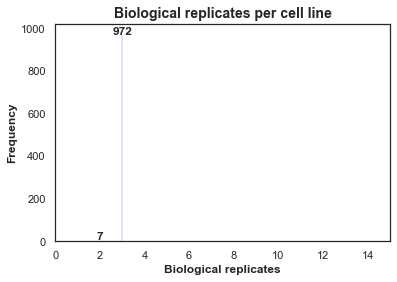

,Rep
Cell_line,
A431,2
BICR22,2
CHSA8926,2
ES6,2
MOLM-13,2
NCI-H1650,2
TMK-1,2


In [49]:
df_rep_bio = df_sample_map[lambda x: (x.Daisy_chain == 'No') & (~x.Cell_line.str.contains('Control_HEK293T'))][['Cell_line','Replicate']].groupby(['Cell_line','Replicate']).size().to_frame('Rep')
df_rep_bio = df_rep_bio.reset_index().groupby('Cell_line').size().to_frame('Rep')
plot = sns.distplot(df_rep_bio['Rep'], kde=False, color='blue')
plot.set_xlim(0,15)
plot.set_xlabel('Biological replicates', weight='bold')
plot.set_ylabel('Frequency', weight='bold')
plot.set_title('Biological replicates per cell line', weight='bold', fontsize=14)
counts = df_rep_bio.groupby('Rep').size().to_frame('Count')
for p in counts.index.tolist():
    plot.text(p, counts.loc[p,'Count'], counts.loc[p,'Count'], ha='center', weight='bold')
plt.show()
df_rep_bio.to_csv('Generate_sample_mapping/E0022_biological_replicates_per_cell_line.txt', sep='\t')
df_rep_bio[lambda x: x.Rep != 3]

These samples each had a dodgy cell pellet that we have decided not to re-source. Analysis will be completed with only 2 biological replicates. 

##### Technical replicates

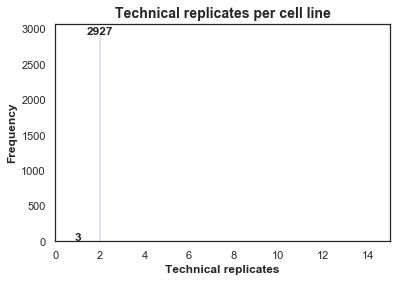

,,Rep
Cell_line,Replicate,
J82,3,1
NCI-H1341,3,1
NCI-H2818,3,1


In [50]:
df_rep_tech = df_sample_map[lambda x: (x.Daisy_chain == 'No') & (~x.Cell_line.str.contains('Control_HEK293T'))][['Cell_line','Replicate']].groupby(['Cell_line','Replicate']).size().to_frame('Rep')
plot = sns.distplot(df_rep_tech['Rep'], kde=False, color='blue')
plot.set_xlim(0,15)
plot.set_xlabel('Technical replicates', weight='bold')
plot.set_ylabel('Frequency', weight='bold')
plot.set_title('Technical replicates per cell line', weight='bold', fontsize=14)
counts = df_rep_tech.groupby('Rep').size().to_frame('Count')
for p in counts.index.tolist():
    plot.text(p, counts.loc[p,'Count'], counts.loc[p,'Count'], ha='center', weight='bold')
plt.show()
df_rep_tech.to_csv('Generate_sample_mapping/E0022_technical_replicates_per_cell_line.txt', sep='\t')
df_rep_tech[lambda x: x.Rep != 2]

Despite getting one good MS run from a cell pellet of each of these samples, we couldn't get a second good one. We have decided not to re-source.

### Finalise dataset according to SWON

In [51]:
files_failed_toffee =[ # These files failed TOFFEE conversion (before Canary was instituted)
    '190714_8730_005re_00ewg_m04_s_1',
    '190715_5650_00840_00exs_m03_s_1',
    '190730_8916_00ejc_00feh_m03_s_1',
    '191012_b44-t1-4_00dlm_00jhh_m03_s_1',
    '191012_b44-t1-5_00dln_00jhi_m03_s_1',
    '191123_b24-t1-16_00jzx_00mt7_m06_s_1',
    '191030_b4-t1-16_00jr1_00l2t_m05_s_1']
df_sample_map = df_sample_map[lambda x: ~x.index.isin(files_failed_toffee)]

In [52]:
files_with_spaces_that_caused_problems = [
'180914_e0022_p02_ hek_h002 _s_m06_1',
'180914_e0022_p02_ hek_h002 _s_m06_2',
'180914_e0022_p02_ hek_h002 _s_m06_3']
for file in files_with_spaces_that_caused_problems:
    df_sample_map.index = df_sample_map.index.str.replace(file,file.replace(' ',''))

In [53]:
df_sample_map.to_csv('Generate_sample_mapping/E0022_P06_sample_map.txt', sep='\t')

In [54]:
df_celline_metadata = df_sample_map.reset_index().drop(['Automatic_MS_filename', 'Batch','Code','Daisy_chain','Date','Instrument','Replicate'], axis=1).set_index('Cell_line').drop(['Control_HEK293T_std_H002','Control_HEK293T_std_H003','Control_HEK293T_lys']).drop_duplicates()
df_celline_metadata.to_csv('Generate_sample_mapping/E0022_P06_cell_line_metadata.txt', sep='\t')

### Sample mapping stats

In [55]:
print('Number of non-HEK cell lines analysed:',len([x for x in df_sample_map['Cell_line'].unique().tolist() if 'Control_HEK293T' not in x]))
print('Number of cancer-types analysed:',len([x for x in df_sample_map['Cancer_type'].unique().tolist() if 'Control_HEK293T' not in x]))
print('Number of tissue-types analysed:',len([x for x in df_sample_map['Tissue_type'].unique().tolist() if 'Control_HEK293T' not in x]))

Number of non-HEK cell lines analysed: 979
Number of cancer-types analysed: 41
Number of tissue-types analysed: 28


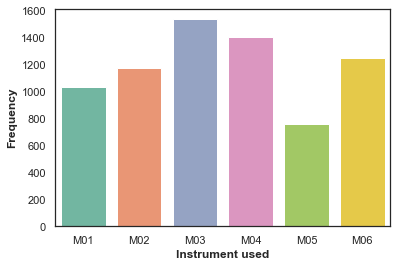

In [56]:
plot = sns.barplot(x='Instrument', y='Count', data=df_sample_map.groupby('Instrument').size().to_frame('Count').reset_index(), hue='Instrument', palette=instrument_colours, dodge=False)
plot.legend_.remove()
plot.set_xlabel('Instrument used', weight='bold')
plot.set_ylabel('Frequency', weight='bold')
plt.show()

In [57]:
df_sample_map = pd.read_csv('Generate_sample_mapping/E0022_P06_sample_map.txt', sep='\t').set_index('Automatic_MS_filename')

In [58]:
df_sample_map['Date'] = df_sample_map['Date'].apply(pd.to_datetime)

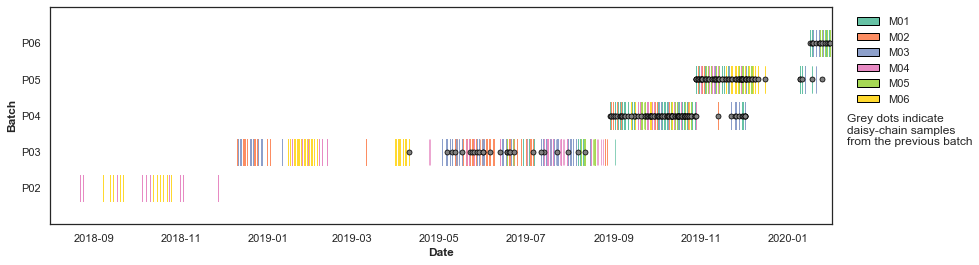

In [59]:
curr_df = df_sample_map.copy()
curr_df['Batch'] = curr_df['Batch'].str.replace('P0','')
curr_df['Batch'] = curr_df['Batch'].astype(float)
fig = plt.figure(figsize=[14,4])
for batch in df_sample_map['Batch'].unique().tolist():
    plot = sns.scatterplot(x='Date', y='Batch', data=curr_df[lambda x: x.Batch == int(batch.replace('P0',''))][lambda x: x.Daisy_chain == 'No'], palette=instrument_colours, hue='Instrument', marker='|', s=700)
    plot = sns.scatterplot(x='Date', y='Batch', data=curr_df[lambda x: x.Batch == int(batch.replace('P0',''))][lambda x: x.Daisy_chain == 'Yes'], color='grey', edgecolor='black', marker='.', s=100)
plot.set_xlim(pd.Timestamp('2018-08-01'),pd.Timestamp('2020-02-01'))
plot.set_xlabel('Date', weight='bold')
plot.set_ylabel('Batch', weight='bold')
plot.set_yticklabels(['','P02','P03','P04','P05','P06'])
plot.set_ylim(1,7)
plot.legend_.remove()
plot.text(0.915,0.4, 'Grey dots indicate\ndaisy-chain samples\nfrom the previous batch', transform=plt.gcf().transFigure)
plt.legend(instrument_patch, list(instrument_colours.keys()), frameon=False, bbox_to_anchor=[1.02,1])
plt.show()

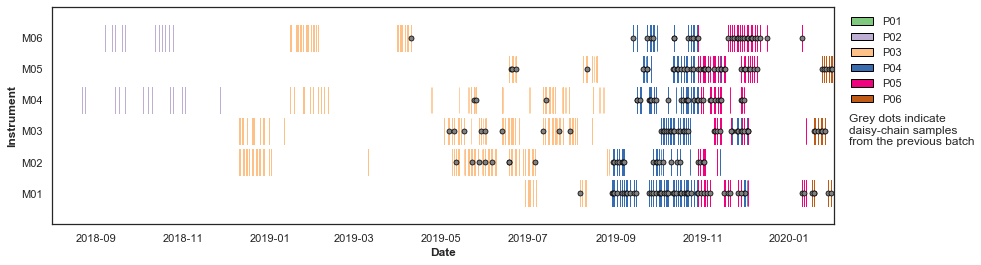

In [60]:
curr_df = df_sample_map.copy()
curr_df['Instrument'] = curr_df['Instrument'].str.replace('M0','')
curr_df['Instrument'] = curr_df['Instrument'].astype(float)
fig = plt.figure(figsize=[14,4])
for instrument in df_sample_map['Instrument'].unique().tolist():
    plot = sns.scatterplot(x='Date', y='Instrument', data=curr_df[lambda x: x.Instrument == int(instrument.replace('M0',''))][lambda x: x.Daisy_chain == 'No'], palette=batch_colours, hue='Batch', marker='|', s=700)
    plot = sns.scatterplot(x='Date', y='Instrument', data=curr_df[lambda x: x.Instrument == int(instrument.replace('M0',''))][lambda x: x.Daisy_chain == 'Yes'], color='grey', edgecolor='black', marker='.', s=100)
plot.set_xlim(pd.Timestamp('2018-08-01'),pd.Timestamp('2020-02-01'))
plot.set_xlabel('Date', weight='bold')
plot.set_ylabel('Instrument', weight='bold')
plot.set_yticklabels(['','M01','M02','M03','M04','M05','M06'])
plot.set_ylim(0,7)
plot.legend_.remove()
plot.text(0.915,0.4, 'Grey dots indicate\ndaisy-chain samples\nfrom the previous batch', transform=plt.gcf().transFigure)
plt.legend(batch_patch, list(batch_colours.keys()), frameon=False, bbox_to_anchor=[1.1,1])
plt.show()